<a href="https://colab.research.google.com/github/Bechilld/MOB4.0/blob/main/Projeto_MOB_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

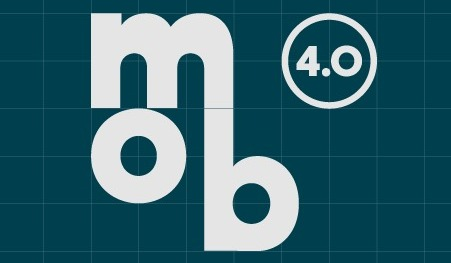

**Processo Seletivo Bolsa PBIC / MOB4.0**

By Bruno Machado/https://www.linkedin.com/in/bruno-machado-106a09163/

Neste notebook, é analisado os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.

#**Do que se trata?**
A mobilidade no dia a dia, é algo tão cotidiano, tão repetitivo ás vezes, que não é notada. Sendo que em nosso tempo e ambiente, é de estrema importância saber o funcionamento de uma cidade, um bairro, uma rua e seus contextos. 
A MOB4.0 entra em ação, dada essa reflexão. Trazendo aos transiuntes **informações e soluções. Abrindo o caminho, o trajeto, para suas escolhas. MOB4.0 busca o melhor para sua mobilidade.** 

##**Qual é importância dessas questões dadas no processo seletivo?**
Tirando o pragmatismo, o fato de ser uma avaliação de conhecimento, as perguntas estão lidando com a geografia em um dado contexto. Buscando e interpretando os dados de um(a) bairro/cidade, fica mais claro os contrastes. Dai entra a importância da análise de dados para buscar as melhores soluções.

##**Questões do processo seletivo:**
*  Quantos bares existem num raio de 30 minutos da minha universidade?
*  De todas as cafeterias da minha cidade, qual fica mais distante da minha universidade e qual
a rota até ela?
*  O modo de transporte — carro, ônibus etc. — varia de acordo com a área média dos
quarteirões de cada bairro?
*  Qual o tempo médio de caminhada — por bairro, p. ex. — a partir de cada cruzamento de
ruas até a escola pública mais próxima?
*  Qual a densidade de restaurantes — restaurantes por $km^2$ — de um bairro e como essa
densidade varia em função do rendimento médio de cada localidade?
*  Como varia o percentual de usuários de transporte público de um bairro em função da
distância dele até o centro?


#**Como está estruturado esse notebook?**
Caso o leitor queira ser objetivo, no índice do notebook está bem dividido em etapas. Deixei fácil, caso o leitor queira ir diretamente para a resposta ou para algum trecho específico. 


#**Quantos bares existem num raio de 30 minutos da minha universidade?**

De antemão, já é possível dizer que a resposta é relativa. Para assumir 30 min de distância, é preciso saber qual é o transporte e assumir as variações da velocidade da trajetória. 
Por isso, como base para busca de dados, é usado uma distância de **14km de distância**, na melhor da hipóteses o veículo percorre em cerca 29km/h. 


##Coleta de dados. 
Foram duas fontes, como é mostrado adiante.
  

##**GooGle Earth.**
No Google Earth é possível pesquisar e copiar os dados encontrados.

In [ ]:
#importar os pacotes necessários necessários.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
#Importar os dados em csv para DataFrame.
df = pd.read_csv("/content/convertcsvfinal.csv", delimiter=';')
#Mostrando as primeiras 5 linhas
df.head()

,name,address,phoneNumber,Point/coordinates,Unnamed: 4,Unnamed: 5
0,Bar do Amarelinho,"Rua Cravos, 21 - Cidade Universitária da Unive...",(21) 3867-6518,"-43.21836769999999,-22.8684407,0",NaN,NaN
1,Cobal bar,"Rua Papoulas, 156 - Cidade Universitária da Un...",(21) 98094-7087,"-43.21758579999999,-22.8682378,0",NaN,NaN
2,"Sempre Rola - açaí, petiscos e bebidas","Rua Cravos, 40 - Cidade Universitária da Unive...",(21) 99745-8656,"-43.2191419,-22.8687659,0",NaN,NaN
3,Boteco do Carvalho,"Rua Papoulas, 535 - Cidade Universitária da Un...",(21) 99947-7396,"-43.2171145,-22.8685608,0",NaN,NaN
4,Mangue,"Av. Pedro Calmon, 7 - Cidade Universitária da ...",NaN,"-43.2204223,-22.85924069999999,0",NaN,NaN


###**Análise dos dados importados do Google Earth.**
🐍 Já é possível ver o mapa da região da universidade. Para isso, basta importar mais o Folium.




In [ ]:
#importando o necessário para visualizar o gráfico.
import folium
from folium.vector_layers import Tooltip

🐍 Obtendo as coordenadas, com o próprio Google Earth.

In [ ]:
#Localizando a universidade no mapa, usando as coordenadas.
mapa = folium.Map(location=[-22.8626877,-43.2258954])

In [ ]:
#Configuando a aparência e zoom necessário.
folium.Map(location=[-22.8626877,-43.2258954], tiles='Stamen Terrain',
zoom_start=15)

A universidade, a Universidade Federal do Rio de Janeiro, têm vários campos. O que estamos analisando, é o da ilha do fundão. Uma ilha, bairro cidade universitária. Existem muitos prédios da própria universidade, **o que deixa a desejar em comércios mais simples, mais cotidianos, como mercados e bares.**  

In [ ]:
# identificar o volume de dados do DataFrame.
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos entradas do dataset.
display(df.dtypes)

Entradas:	 168
Variáveis:	 6



name                  object
address               object
phoneNumber           object
Point/coordinates     object
Unnamed: 4           float64
Unnamed: 5           float64
dtype: object

**Essas 168 entradas, já seria a possível resposta(O número de bares). Mas é preciso analisar mais esses dados.**

🐍 Ainda analisando os dados dessa primeira base de dados. 

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Unnamed: 4           1.000000
Unnamed: 5           1.000000
phoneNumber          0.416667
name                 0.107143
address              0.000000
Point/coordinates    0.000000
dtype: float64

As váriaveis não ajudam muito para elaborar comparações entre os comércios. Exemplo, comparar números de telefones fogem do direcionamento. 

In [ ]:
df['name'].unique()

array(['Bar do Amarelinho', 'Cobal bar',
       'Sempre Rola - açaí, petiscos e bebidas', 'Boteco do Carvalho',
       'Mangue', 'Tulipas Bar', 'Bar da Reitoria',
       'Bar, Chopperia, Restaurante Familiar - Nossa Petiscaria Buscapé é localizada na Maré',
       'Budy Fundão', 'Chiquinho Bar', 'Kilowatts', 'BR Mania',
       'Bar do Peixe', 'Damascenos Bar', 'Perimetral Restaurante',
       'Bar Filó', 'Projectus Restaurante', 'Bar Manoel', 'Texas Garden',
       'Bar Da Taty', 'Raposa Bar', 'BAR DO GULOSÃO',
       'Depósito De Bebidas Do André', 'Mura Culinária Japonesa',
       'Bar Do Baixinho', 'Bar Padaria e Mercearia Sao Jorge Mix.',
       'Bar e Mercearia Maria Clara', 'DD Dilcinha Lanches',
       'Bar & Pensão Zeu', 'Manel Food', 'Restaurante do CT',
       'Bar Do Beline', 'Di Mare II', "Batista's Lanches",
       'Restaurante Universitário - Letras', 'Big Neth', 'Garoupas Bar',
       'Churrasco Night bar', 'Bar da Portuguesa', 'Trayler Da Geisa',
       'Bom Gosto Lanch

O que compensa, no caso específico, é **comparar os nomes**, já que existem nomes como "Mister Burguer ilha", que pode ser apenas uma lanchonete comum, caso a busca for por bares bem definidos. 
**Comparar nomes**, **aumentaria a probabilidade**, caso o nome tiver bar ou algum aspecto sujestivo.

In [ ]:
#Identificando os dados pelo nome 'BAR'.
c=0
somanome=0
maisomanome=0
nm=df['name'].unique()
for c in range(0,len(nm)-1):
     nm[c]
     if 'Bar' or 'bar' in nm[c]:
       somanome=somanome+1
print(f'Número comércios que tem "Bar" no nome:\t{somanome}')
print(f'Porcentagem:                           \t{89.29}%')

Número comércios que tem "Bar" no nome:	150
Porcentagem:                           	89.29%


Informação importante, **89.29% dos dados são ditos bares.** Aumenta a confiança em acerto de localização. Exemplo, caso de parceria, caso de um planejamento de fazer os pontos dos transportes próximo aos bares, para que os clientes usem mais o transporte público quando alcolizado, **aumentando a segurança do cliente graças a identificação do estebelecimento.** 

##**Overpass.**

A plataforma overpass turbo(https://overpass-turbo.eu/) é uma ótima **ferramenta para coletar dados** e até mesmo compará-los. 

In [ ]:
#importando os dados csv do overpass
op= pd.read_csv("/content/convertcsvFinaloverpass.csv", delimiter=';')
#Mostrando as 5 primeiras linhas
op.head()

,ExtendedData/Data/0/value,ExtendedData/Data/0/_name,ExtendedData/Data/1/value,ExtendedData/Data/1/_name,longitude,latitude,name,ExtendedData/Data/2/value,ExtendedData/Data/2/_name,ExtendedData/Data/3/value,...,ExtendedData/Data/7/_name,ExtendedData/Data/8/value,ExtendedData/Data/8/_name,ExtendedData/Data/9/value,ExtendedData/Data/9/_name,ExtendedData/Data/10/value,ExtendedData/Data/10/_name,ExtendedData/Data/11/value,ExtendedData/Data/11/_name,description
0,node/331956591,@id,pub,amenity,-43.176460,-22.964106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/332517429,@id,pub,amenity,-43.177687,-22.929709,Esquina do Chopp,Potlatch 0.10f,created_by,Esquina do Chopp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/338513866,@id,pub,amenity,-43.111282,-22.902680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/340459666,@id,22211-200,addr:postcode,-43.177710,-22.923942,NaN,Rua Pedro Américo,addr:street,pub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/344562455,@id,Rio de Janeiro,addr:city,-43.190334,-22.936071,Tasca do Edgar,34,addr:housenumber,Rua Alice,...,name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Os dados do OverPass estão misturados, acabam dificultando uma analise melhor.

In [ ]:
# identificar o volume de dados do DataFrame.
print("Entradas:\t {}".format(op.shape[0]))
print("Variáveis:\t {}\n".format(op.shape[1]))

# verificar os tipos entradas do dataset.
display(op.dtypes)

Entradas:	 339
Variáveis:	 28



ExtendedData/Data/0/value      object
ExtendedData/Data/0/_name      object
ExtendedData/Data/1/value      object
ExtendedData/Data/1/_name      object
longitude                     float64
latitude                      float64
name                           object
ExtendedData/Data/2/value      object
ExtendedData/Data/2/_name      object
ExtendedData/Data/3/value      object
ExtendedData/Data/3/_name      object
ExtendedData/Data/4/value      object
ExtendedData/Data/4/_name      object
ExtendedData/Data/5/value      object
ExtendedData/Data/5/_name      object
ExtendedData/Data/6/value      object
ExtendedData/Data/6/_name      object
ExtendedData/Data/7/value      object
ExtendedData/Data/7/_name      object
ExtendedData/Data/8/value      object
ExtendedData/Data/8/_name      object
ExtendedData/Data/9/value      object
ExtendedData/Data/9/_name      object
ExtendedData/Data/10/value     object
ExtendedData/Data/10/_name     object
ExtendedData/Data/11/value     object
ExtendedData

Nesse caso, como mostrado acima, o número de entradas/bares é igual a 339.

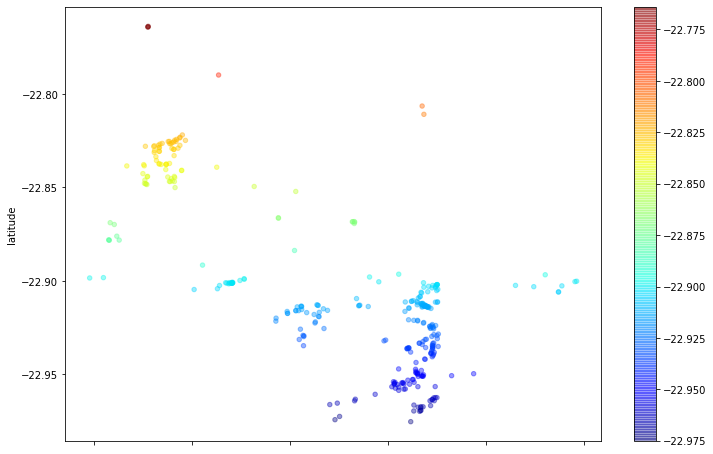

In [ ]:
#plotar bares por latitude e longetude.
op.plot(kind="scatter", x='longitude',y='latitude', alpha=0.4 , c=op['latitude'], cmap=plt.get_cmap('jet'), figsize=(12,8));

A demanda de bares está mais ao Sul, onde está o centro do Rio de Janeiro (E próximo a praia). 

##**Resposta da primeira questão:**
**O número de bares próximo a minha universidade, está entre 150 a 339.**
*  Observação: Existe uma comunidade, comunidade da maré, entre outros lugares próximos, que possivelmente existem bares pequenos. Bares menores podem não ser encontrado em registros publicos.

#**De todas as cafeterias da minha cidade, qual fica mais distante da minha universidade e qual a rota até ela?** 

Essa pergunta é mais complexa, pois nem o Ipeadata, nem o Data.rio, estão fornecendo dados favoraveis para uma analise dessa para o Rio de Janeiro. 
Sendo assim, **optei por escolher uma cafeteria no mapa**, no Google Earth mesmo, uma longe. 

A cafeteria escolhida se chama **Cafuné**, fica na barra da tijuca. 

##Para sofisticar, o caminho dessa questão, começa como se houvesse só o CEP e o número do estabelecimento.

*  **CEP:** 22640-100.

In [ ]:
#mostrando onde fica o Cafuné.
cep = "22640100"
import requests
link = f'https://viacep.com.br/ws/{cep}/json/'
requisição=requests.get(link)
print(requisição.json())
#organizando o dicionário.
dic_requisição=requisição.json()
uf=dic_requisição['uf']
cidade=dic_requisição['localidade']
bairro=dic_requisição['bairro']


{'cep': '22640-100', 'logradouro': 'Avenida das Américas', 'complemento': 'até 1600 - lado par', 'bairro': 'Barra da Tijuca', 'localidade': 'Rio de Janeiro', 'uf': 'RJ', 'ibge': '3304557', 'gia': '', 'ddd': '21', 'siafi': '6001'}


🐍 Agora está direcionado.

In [ ]:
print("UF:\t{}".format(uf))
print("Cidade:\t{}".format(cidade))
print("Bairro:\t{}".format(bairro))

UF:	RJ
Cidade:	Rio de Janeiro
Bairro:	Barra da Tijuca


A seguir, é o local, no mapa.

In [ ]:
#importando o mapa.
localcafeteria = folium.Map(location=[-23.0026183,-43.3221022],tiles='Stamen Terrain', zoom_start=11.2)
#Marcando a cafeteria no mapa. 
folium.Marker([-23.0026183,-43.3221022],
    popup="<i>Cafeteria Cafuné</i>", tooltip='Clique Aqui'
     ).add_to(localcafeteria);
#Marcando a Universidade Federal do Rio de Janeiro.
folium.Marker([-22.8626877,-43.2258954],
    popup="<i>Universidade Federal do Rio de Janeiro</i>", tooltip='Clique Aqui'
     ).add_to(localcafeteria);


In [ ]:
localcafeteria

##**Resposta da segunda questão:**

###Novamente, a escolha foi o Google Earth.


Google Earth tem credibilidade e é altamente avançado. Na imagem a baixo contém o caminho e umas frases para a orientação. 

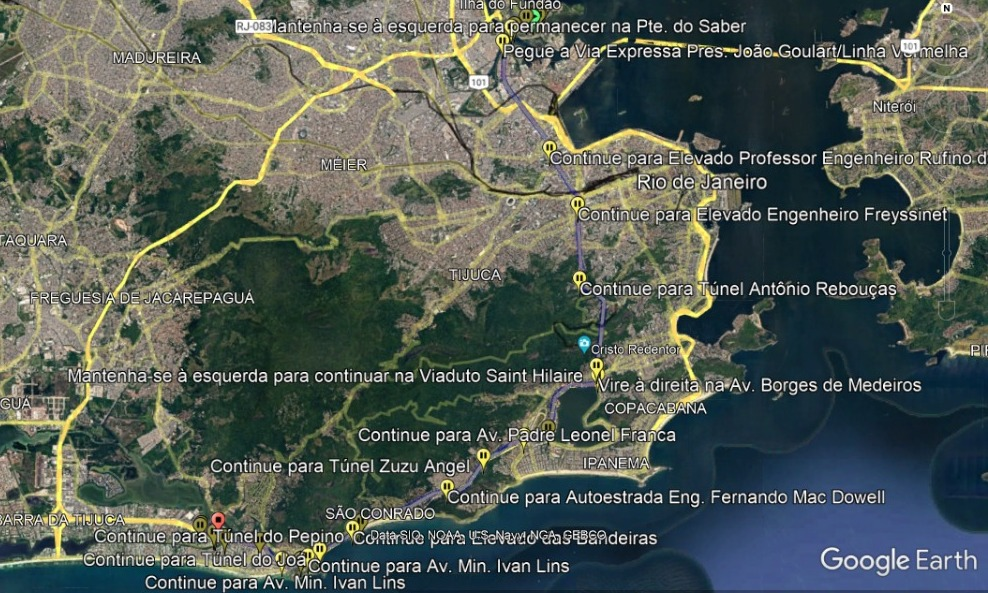

Existem várias opções, transportes, para essa trajetória. 
O mais comum, é sair da ilha do Fundão (Cidade Universitária) e buscar o metrô. O metrô é vai direto para a Barra da Tijuca, normalmente o **metrô é mais rápido que outros transportes.**
1. Pegar o Onibús 485 para sair da Cidade Universitária.
2. Desce no metrô, de preferência na Cidade Nova(Onde tem uma passarela enorme, fácil identificar.
3. Dentro do metrô, sairá já na Barra da Tijuca. Na saída, há o BRT. E só descer no local. 




**Claro, existe muitas outras opções, até pelo longo caminho, como sair de BRT da Ilha do Fundão. Mas os passos citados, é uma das boas opções(Pensando em velocidade).**

#**O modo de transporte — carro, ônibus etc. — varia de acordo com a área média dos quarteirões de cada bairro?**

##**Essa questão exige duas respostas, como é mostrado nesse notebook.**

## **Como identificar a quantidade de trânsporte de uma região?**
Como parâmetro, foi coletado dados do Openstreetmap. A idéia é analisar o número de pontos de ônibus. O número de ponto de ônibus pode indicar que existem diferentes rotas passando por um mesmo lugar.

In [ ]:
#Dados sobre pontos de ônibus na cidade do Rio de Janeiro.
bairrobus = pd.read_csv("/content/stopbus-atualizado.csv", delimiter=';')

In [ ]:
#Analisando os dados.
bairrobus.describe()

,longitude,latitude
count,3258.000000,3258.000000
mean,-43.277111,-22.789737
std,0.467816,0.212313
min,-44.792987,-23.352087
25%,-43.416564,-22.914824
50%,-43.243800,-22.847832
75%,-43.161772,-22.747064
max,-41.111142,-21.341005


O desvio padrão está dentro do normal. Mas isso é resultado da escala, as coordenadas são só da capital do Rio de Janeiro.

🐍 Fica interessante observar por uma visão 2D.

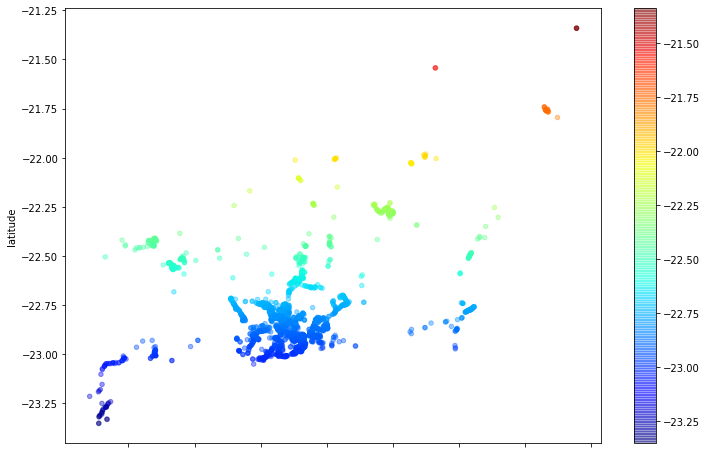

In [ ]:
bairrobus.plot(kind="scatter", x='longitude',y='latitude', alpha=0.4 , c=bairrobus['latitude'], cmap=plt.get_cmap('jet'), figsize=(12,8));

Nota-se, caro leitor, que na a concentração dos pontos de ônibus está mais ao sul. O que lembra a concentração dos bares.
 

##Então, já existe uma variação dentro da cidade.
*  Além, como indica haver mais pontos de ônibus no centro da cidade, é onde passa o metrô. O metrô não atende toda a cidade, mais uma variação.  

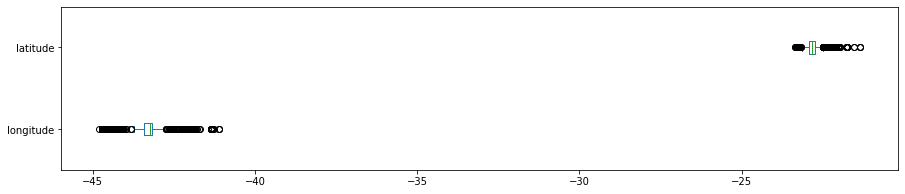

In [ ]:
bairrobus.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

Os pontos se concentram numa área específica.

**Com essa reflexão, podemos analisar mais?**

Sim, as variações não estão só na concentração do transporte.

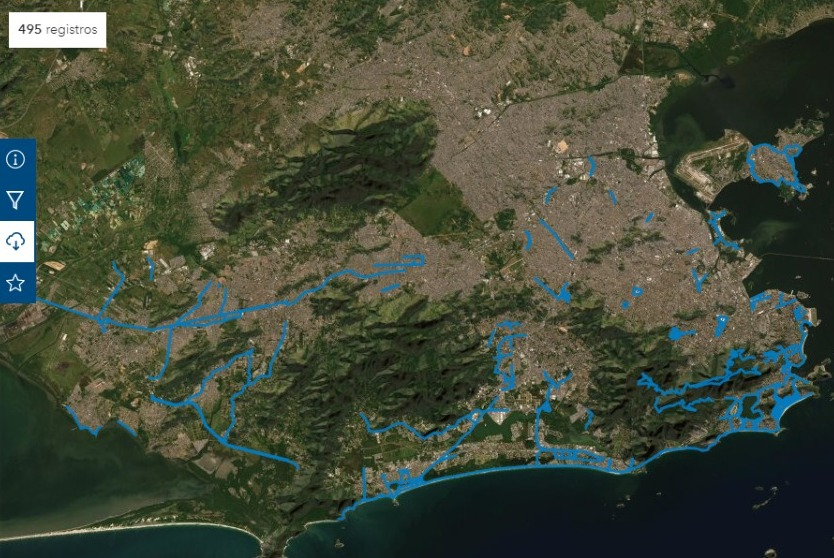

##**Essa imagem foi retirada do Data.Rio, nela mostra por onde passam as ciclovias da cidade do Rio de Janeiro.**

Por mais que as ciclovias estejam mais distribuidas pela cidade que o caso anterior, ainda existe um contraste, regiões como a zona norte, tem menos que as regiões próximas as praias.

##Resposta da terceira questão:
Sim, existe variação, como foi apresentada. Variação que envolve densidade de recursos e variação pelo planejamento da cidade.

#**Qual o tempo médio de caminhada — por bairro, p. ex. — a partir de cada cruzamento de ruas até a escola pública mais próxima?**

Os bairros não são iguais, principalmente pelo Rio de Janeiro ser uma cidade montanhosa. 
Os dados fornecido pela prefeitura do Rio, sobre densidade demográfica (http://www.rio.rj.gov.br/dlstatic/10112/7720635/4211818/3.1.pdf), mostra como os padrões da cidade são muito dispersos. Exemplo, no relatório da prefeitura (Pag.283), mostra como a densidade por hectare é alta em lugares como Copacabana.

Mas dado documento, **a média de espaço construído dentro da cidade, tamanho do bairro por casas**, está entre 10.000 e 15.000 $m^2$/Ha como média. 


##Estimando o valor de 7.500 $m^2$/Ha.

Tirando a Raiz quadrada, de 7.500, da estimados 86.60 $m$/Ha.
*  O que são esses 86 metros? 

**De uma esquina a outra, terá 86 metros.** Claro, tudo de acorodo com a estimativa, já que os bairros não são todos quadrados, não são todos iguais.

##**Resposta da quarta questão.**

Se o leitor a cada segundo percorre um metro, em 86 segundos percorrerar 86 metros. Estimando que tem uma escola por quarteirão, até pelas variedades, Fundamental, Ensino Médio, Ensido Privado e etc. 

De uma esquina a outra, se a escola estiver no fim de uma esquina, normalmente a pessoa vai caminhar 86 segundos, no caso 1,43 min. Esse tempo é estimado, não encontrei base de dados. 

#Qual a densidade de restaurantes — restaurantes por $km^2$ — de um bairro e como essa densidade varia em função do rendimento médio de cada localidade?

Não foi encontrado as informações necessárias para responder essa pergunta.

##**Resposta da quinta questão.**
Para a resposta, seria necessário uma base de dados, dados sobre quantidade de restaurantes por bairro. Sem a base, só é possível analisando bairro por bairro, e mesmo assim a precisão não é tão boa. 


Mas observando o mapa da cidade, fica sugestivo que haverá variação na densidade. Como foi visto com os bares.


#**Como varia o percentual de usuários de transporte público de um bairro em função da distância dele até o centro?**

##**Resposta da sexta questão.**

Infelizmente também não foi encontrado dados para essa questão. Talvez essa exigisse fazer um Web Scraping do Google Maps. No caso, essa não tem uma resposta.

#**Conclusão.**

A ausência de dados me dificultou, os sites públicos deixam a desejar. Acredito que com mais prática é algo que eu aprenda a lidar e eventualmente aprenda a encontrar melhores fontes. 
Sobre as questões, acredito que foram pensadas para instigar nós, os participantes, sobre a ciência de dados aplicada ao mapa, especificamente mapas de mobilidade, mapas das necessidades de um transeunte e etc. Notei que, sempre haverá um contraste, minúcias pontuais, ao analisar esses mapas. São questões que vou sempre buscar melhorar, para sempre notar que existe um movimento nessas relações, olhar um mapa não é uma visão permanente, é saber que as posições mudam e como a experiência ajuda nessas mudanças.